In [1]:
from mylibs import stats as st
from mylibs import resample as rs
from mylibs import linear_model as lm
from mylibs import metrics as me
from mylibs import transform as tm
import numpy as np
import pandas as pd
import importlib 
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt



In [2]:
importlib.reload(st)
importlib.reload(rs)
importlib.reload(lm)
importlib.reload(me);


In [3]:
data = pd.read_csv("winequality-red.csv",delimiter=';')

In [4]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Questão 02

In [5]:
#<h3></h3>

In [6]:
dt = data.values
X = dt[:,:11]
y = dt[:,11]

In [7]:
lin_ = data.shape[0]
idx_train,idx_test = rs.split_k_fold(lin_,5)

In [8]:
model_SGDR = linear_model.SGDRegressor()
model_Linear = linear_model.LinearRegression()
model_LinearSVR = svm.LinearSVR()
model_SVR = svm.SVR()
model_RandomForest = ensemble.RandomForestRegressor()
model_GradientBoosting = ensemble.GradientBoostingRegressor()

# SGDR

In [9]:
sgdr_mse = 0.0
for i in range(5):
    model_SGDR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_SGDR.predict(X[idx_test[i]])
    sgdr_mse = sgdr_mse + me.mse(y[idx_test[i]],y_pred)
sgdr_mse

/home/leonardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


8.540001756975864e+25

# linear

In [10]:
ln_mse = 0.0
for i in range(5):
    model_Linear.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_Linear.predict(X[idx_test[i]])
    ln_mse = ln_mse + me.mse(y[idx_test[i]],y_pred)
ln_mse

2.1376501959885204


# linear SVR

In [11]:
l_svr_mse = 0.0
for i in range(5):
    model_LinearSVR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_LinearSVR.predict(X[idx_test[i]])
    l_svr_mse = l_svr_mse + me.mse(y[idx_test[i]],y_pred)
l_svr_mse

6.5810976250335855

# SVR

In [12]:
svr_mse = 0.0
for i in range(5):
    model_SVR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_SVR.predict(X[idx_test[i]])
    svr_mse = svr_mse + me.mse(y[idx_test[i]],y_pred)
svr_mse

2.412338458955751

# Random Forest

In [13]:
random_mse = 0.0
for i in range(5):
    model_RandomForest.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_RandomForest.predict(X[idx_test[i]])
    random_mse = random_mse + me.mse(y[idx_test[i]],y_pred)
random_mse

1.8739285854232017

# Gradiente

In [14]:
gradient_mse = 0.0
for i in range(5):
    model_GradientBoosting.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_GradientBoosting.predict(X[idx_test[i]])
    gradient_mse = gradient_mse + me.mse(y[idx_test[i]],y_pred)
gradient_mse

1.932074138229813

# Questão 03

In [15]:
class_names = ['Linear_R','L_SVR','SVR','Random_F','Gradient_B']
class_ = [ln_mse,l_svr_mse,svr_mse,random_mse,gradient_mse]

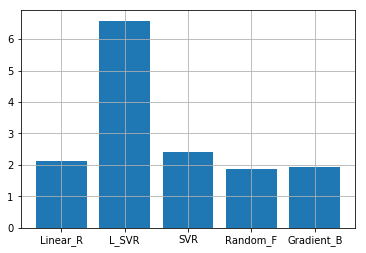

In [16]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);

# Questão 04

In [17]:
model_Valendo = ensemble.RandomForestRegressor()
model_Valendo.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred_Valendo = model_Valendo.predict(X)
me.mse(y,y_pred_Valendo)

0.06412132582864376

# Questão 05

No Gradiente Descendente(GD), você tem que percorrer TODAS as amostras em seu conjunto de treinamento para fazer uma única atualização para um parâmetro em uma iteração específica, enquanto no Stochastic Gradient Descent(SGD), por outro lado, você usa SOMENTE uma amostra ou subconjunto de amostras de treinamento do seu conjunto de treinamento para fazer a atualização de um parâmetro em uma iteração específica.